<a href="https://colab.research.google.com/github/danielapavas/Optimizacion/blob/main/Metodo_de_bisecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# **MÉTODO DE BISECCIÓN**




Raíz aproximada: 0.84716796875
Valor de la función en la raíz: 0.49292445182800293


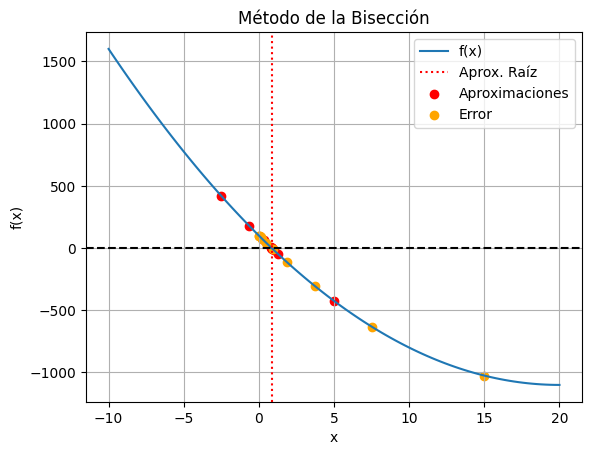


Tabla de datos:
    Iteración  Aproximación         xl         xu      Error
0           1      5.000000 -10.000000  20.000000  15.000000
1           2     -2.500000 -10.000000   5.000000   7.500000
2           3      1.250000  -2.500000   5.000000   3.750000
3           4     -0.625000  -2.500000   1.250000   1.875000
4           5      0.312500  -0.625000   1.250000   0.937500
5           6      0.781250   0.312500   1.250000   0.468750
6           7      1.015625   0.781250   1.250000   0.234375
7           8      0.898438   0.781250   1.015625   0.117188
8           9      0.839844   0.781250   0.898438   0.058594
9          10      0.869141   0.839844   0.898438   0.029297
10         11      0.854492   0.839844   0.869141   0.014648


In [ ]:
def biseccion(funcion, xl, xu, tolerancia, maximo):
    if funcion(xl) * funcion(xu) >= 0:
        raise ValueError("La función no cumple con el teorema de Bolzano en el intervalo dado.")

    i = 0
    listaError = []
    listaAproximacion = []
    listaXL = []  # Lista para almacenar xl en cada iteración
    listaXU = []  # Lista para almacenar xu en cada iteración


    while (xu - xl) / 2 > tolerancia and i < maximo:
        xr = (xl + xu) / 2
        listaAproximacion.append(xr)
        listaXL.append(xl)  # Agregar xl actual a la lista
        listaXU.append(xu)  # Agregar xu actual a la lista

        error = abs((xu - xl) / 2)
        listaError.append(error)
        i += 1

        if funcion(xl) * funcion(xr) == 0:
            return xr, listaAproximacion, listaError, listaXL, listaXU

        elif funcion(xl) * funcion(xr) < 0:
            xu = xr
        else:
            xl = xr



    return (xl + xu) / 2, listaAproximacion, listaError, listaXL, listaXU

#ejemplo
def ejemplo(x):
    return 3*x**2 - 120*x +100

xl = -10
xu = 20
tolerancia = 0.01
maximo = 100

root, listaAproximacion, listaError, listaXL, listaXU = biseccion(ejemplo, xl, xu, tolerancia, maximo)
valor_en_raiz = ejemplo(root) # Evaluar la función en la raíz aproximada
print("\nRaíz aproximada:", root)
print("Valor de la función en la raíz:", valor_en_raiz)

# Crear gráfica si hay datos
if listaAproximacion:
    x = np.linspace(xl, xu, 100)
    y = ejemplo(x)

    plt.plot(x, y, label='f(x)')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axvline(x=root, color='red', linestyle=':', label='Aprox. Raíz')
    plt.scatter(listaAproximacion, [ejemplo(x) for x in listaAproximacion], color='red', label='Aproximaciones')
    plt.scatter(listaError, [ejemplo(x) for x in listaError], color='orange', label='Error')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.title('Método de la Bisección')
    plt.show()


  #Tabla de datos
if listaError:
    data = {
        "Iteración": list(range(1, len(listaAproximacion) + 1)),
        "Aproximación": listaAproximacion,
        "xl": listaXL,
        "xu": listaXU,
        "Error": listaError,
    }

    df = pd.DataFrame(data)

    print("\nTabla de datos:")
    print(df)


# **MÉTODO DE INTERPOLACIÓN CUADRÁTICA**


Valor máximo de f(x) = 1.77143091252755 en x = 1.4902527508500858


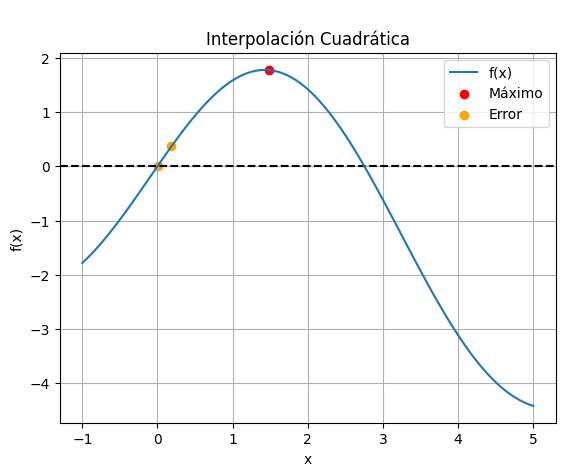


Tabla de datos :
   Iteración  x0        x1  x2        x3  vertex_fx     error
0          1   0  1.000000   4  1.505535   1.769079  0.186137
1          2   1  1.505535   4  1.490253   1.771431  0.002352


In [ ]:
def interpolacionCuadratica(f, x0, x1, x2, minimize=True, tol=0.1, maximo=100):
    history = []  # Almacenar datos para la tabla
    errores = []

    for i in range(maximo):
        fx0 = f(x0)
        fx1 = f(x1)
        fx2 = f(x2)

        # Calcular x3 mediante la fórmula dada
        x3 = (fx0 * (x1**2 - x2**2) + fx1 * (x2**2 - x0**2) + fx2 * (x0**2 - x1**2)) /(2 * fx0 * (x1 - x2) + 2 * fx1 * (x2 - x0) + 2 * fx2 * (x0 - x1))

        vertex_fx = f(x3)

        error = abs(vertex_fx - fx1)
        history.append((i + 1, x0, x1, x2, x3, vertex_fx, error))
        errores.append(error)

        if vertex_fx >= fx1 and x3 > x1:
                x0 = x1
                x1 = x3
                fx0 = fx1
                fx1 = vertex_fx

        elif vertex_fx > fx1 and x3 < x1 :
                x1 = x3
                x2 = x1
                fx2 = vertex_fx
                fx1 = vertex_fx

        elif vertex_fx < fx1 :
                x2 = x1
                x1 = x3
                fx2 = fx1
                fx1 = vertex_fx

        if error < tol * abs(fx1):
              break


    df = pd.DataFrame(history, columns=['Iteración', 'x0', 'x1', 'x2', 'x3', 'vertex_fx', 'error'])

    return x1, f(x1), df, errores

def f(x):
    return 2 * np.sin(x) - x**2 / 10

x0 = 0
x1 = 1
x2 = 4

# Buscar máximo
max_x, max_valor, max_history, errores = interpolacionCuadratica(f, x0, x1, x2, minimize=False)

# Imprimir resultados
print("\nValor máximo de f(x) =", max_valor, "en x =", max_x)

# Generar gráficos
x_vals = np.linspace(-1, 5, 100)
y_vals = f(x_vals)
plt.axhline(y=0, color='black', linestyle='--')
plt.plot(x_vals, y_vals, label='f(x)')
plt.scatter([max_x], [max_valor], color='red', label='Máximo')
plt.scatter(errores, [f(x) for x in errores], color='orange', label='Error')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('\nInterpolación Cuadrática')
plt.legend()
plt.grid(True)
plt.show()

# Tabla de datos
#Tabla de datos para el máximo
print("\nTabla de datos :")
print(max_history)


# **MÉTODO DE LA SECCIÓN DORADA**

Máximo aproximado en x: 1.4326691025103049
Valor máximo: 1.7756971093311618


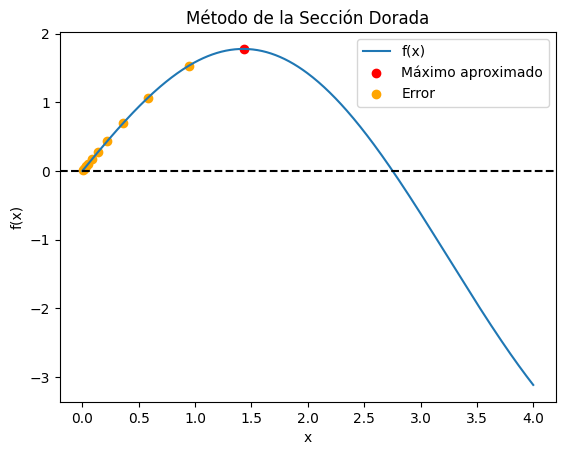


Tabla de datos:
    Iteración        xl        xu        x1        x2  Máximo aprox     Error
0           1  0.000000  2.472136  2.472136  1.527864      1.236068  0.944272
1           2  0.944272  2.472136  1.527864  0.944272      1.708204  0.583592
2           3  0.944272  1.888544  1.888544  1.527864      1.416408  0.360680
3           4  1.304952  1.888544  1.527864  1.304952      1.596748  0.222912
4           5  1.304952  1.665631  1.665631  1.527864      1.485292  0.137767
5           6  1.304952  1.527864  1.527864  1.442719      1.416408  0.085145
6           7  1.390097  1.527864  1.442719  1.390097      1.458980  0.052622
7           8  1.390097  1.475242  1.475242  1.442719      1.432669  0.032522
8           9  1.390097  1.442719  1.442719  1.422619      1.416408  0.020100
9          10  1.410197  1.442719  1.422619  1.410197      1.426458  0.012422
10         11  1.422619  1.442719  1.430297  1.422619      1.432669  0.007678


In [42]:
def seccionDorada(funcion, xl, xu, tolerancia, maximo):
    phi = (1 + (5 ** 0.5)) / 2  # Valor de la razón áurea

    listaError = []
    valores_xl = []
    valores_xu = []
    valores_x1 = []
    valores_x2 = []
    valores_maXimo_X = []
    valores_funcion = []

    def f(x):
        return funcion(x)

    for i in range(maximo):
        d = (phi - 1) * (xu - xl)
        x1 = xl + d
        x2 = xu - d

        if f(x2) > f(x1):  #Para hallar el minimo intercambiamos
            xu = x1
        else:
            xl = x2
        error = abs(x1 - x2)
        listaError.append(error)
        valores_xl.append(xl)
        valores_xu.append(xu)
        valores_x1.append(x1)
        valores_x2.append(x2)
        maXimo_X = (xl + xu) / 2
        valores_maXimo_X.append(maXimo_X)
        valores_funcion.append(f(maXimo_X))

        if error < tolerancia:
            break

    maximoValor = f(maXimo_X)

    return maXimo_X, maximoValor, listaError, valores_xl, valores_xu, valores_x1, valores_x2, valores_maXimo_X, valores_funcion

# Función de ejemplo
def f(x):
    return 2 * np.sin(x) - (x ** 2) / 10

xl = 0
xu = 4
tolerancia = 0.01
maximo = 100

maXimo_X, maximoValor, listaError, valores_xl, valores_xu, valores_x1, valores_x2, valores_maXimo_X, valores_funcion = seccionDorada(f, xl, xu, tolerancia, maximo)

print("Máximo aproximado en x:", maXimo_X)
print("Valor máximo:", maximoValor)

# Crear gráfica
x_valor = np.linspace(xl, xu, 400)
y_valor = f(x_valor)

plt.plot(x_valor, y_valor, label='f(x)')
plt.scatter(maXimo_X, maximoValor, color='red', label='Máximo aproximado')
plt.scatter(listaError, [f(x) for x in listaError], color='orange', label='Error')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Método de la Sección Dorada')
plt.show()

# Crear tabla de datos
data = {
    'Iteración': [i+1 for i in range(len(valores_xl))],
    'xl': valores_xl,
    'xu': valores_xu,
    'x1': valores_x1,
    'x2': valores_x2,
    'Máximo aprox': valores_maXimo_X,
    'Error': listaError
}

df = pd.DataFrame(data)
print("\nTabla de datos:")
print(df)

# **MÉTODO DE FALSA POSICIÓN**

La raíz de la funcion es: 0.8515055936439584
Valor de la función en la raíz: -0.005485909254161925


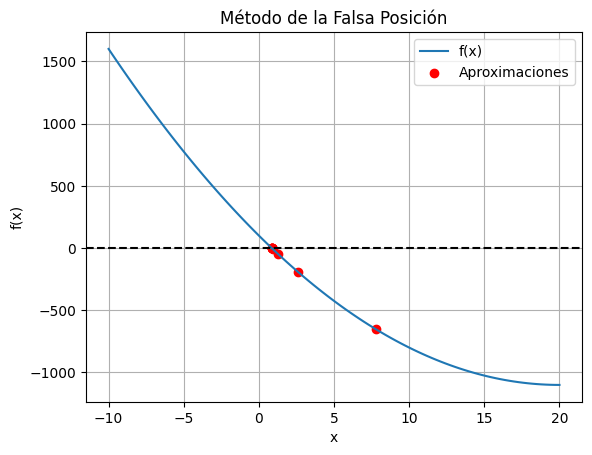


Tabla de datos:
   Iteración  Aproximación       Error
0          1      7.777778  651.851852
1          2      2.631579  195.013850
2          3      1.259259   46.353909
3          4      0.942249   10.406408
4          5      0.871541    2.306133
5          6      0.855894    0.509585
6          7      0.852437    0.112531
7          8      0.851674    0.024847
8          9      0.851506    0.005486


In [38]:
def falsa_posicion(a, b, tol, max_iter):

    aproximaciones = []
    errores = []

    for i in range(max_iter):
        fa = f(a)
        fb = f(b)
        #c = (a * fb - b * fa) / (fb - fa)
        c = b - (fb *( a- b))/ (fa - fb)


        aproximaciones.append(c)

        error = abs(f(c))
        errores.append(error)

        if error < tol:
            return c,aproximaciones, errores

        if fa * f(c) < 0:
            b = c
        else:
            a = c

    return None, aproximaciones, errores


def f(x):
    return 3*x**2 - 120*x +100

a = -10
b = 20
tolerancia = 0.01
max_iteraciones = 100

# Ejecutar el método de la falsa posición
raiz, aproximaciones, errores = falsa_posicion(a, b, tolerancia, max_iteraciones)

valor_en_raiz = f(raiz)
if raiz is not None:
    print("La raíz de la funcion es:", raiz)
    print("Valor de la función en la raíz:", valor_en_raiz)

else:
    print("El método no convergió")

# rango de valores x para la gráfica de la función
x = np.linspace(a, b, 100)
y = f(x)

# Gráfica de la función
plt.plot(x, y, label='f(x)')
plt.axhline(y=0, color='black', linestyle='--')
plt.scatter(aproximaciones, [f(x) for x in aproximaciones], color ='red', label='Aproximaciones')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Método de la Falsa Posición')
plt.legend()
plt.grid(True)

plt.show()

if errores:
    data = {
        "Iteración": list(range(1, len(aproximaciones) + 1)),
        "Aproximación": aproximaciones,
        "Error": errores,
    }

df = pd.DataFrame(data)

print("\nTabla de datos:")
print(df)


La raíz de la función es: 0.8515055936439584
Valor de la función en la raíz: -0.005485909254161925


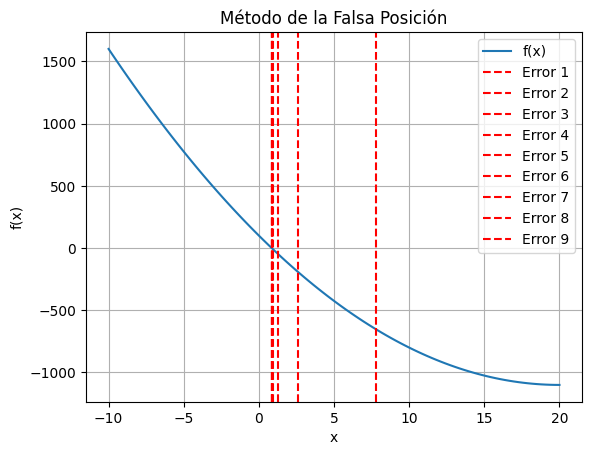


Tabla de datos:
   Iteración  Aproximación       Error  Valor de a  Valor de b
0          1      7.777778  651.851852         -10   20.000000
1          2      2.631579  195.013850         -10    7.777778
2          3      1.259259   46.353909         -10    2.631579
3          4      0.942249   10.406408         -10    1.259259
4          5      0.871541    2.306133         -10    0.942249
5          6      0.855894    0.509585         -10    0.871541
6          7      0.852437    0.112531         -10    0.855894
7          8      0.851674    0.024847         -10    0.852437
8          9      0.851506    0.005486         -10    0.851674


In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Función cuya raíz queremos encontrar
def f(x):
    return 3*x**2 - 120*x + 100

# Método de la falsa posición
def falsa_posicion(a, b, tol, max_iter):
    aproximaciones = []
    errores = []
    valores_a = []  # Lista para almacenar los valores de a
    valores_b = []  # Lista para almacenar los valores de b

    for i in range(max_iter):
        fa = f(a)
        fb = f(b)
        c = b - (fb * (a - b)) / (fa - fb)

        aproximaciones.append(c)
        valores_a.append(a)
        valores_b.append(b)

        error = abs(f(c))
        errores.append(error)

        if error < tol:
            return c, aproximaciones, errores, valores_a, valores_b

        if fa * f(c) < 0:
            b = c
        else:
            a = c

    return None, aproximaciones, errores, valores_a, valores_b

# Parámetros iniciales
a = -10
b = 20
tolerancia = 0.01
max_iteraciones = 100

# Ejecutar el método de la falsa posición
raiz, aproximaciones, errores, valores_a, valores_b = falsa_posicion( a, b, tolerancia, max_iteraciones)

valor_en_raiz = f(raiz)
if raiz is not None:
    print("La raíz de la función es:", raiz)
    print("Valor de la función en la raíz:", valor_en_raiz)
else:
    print("El método no convergió")

# Crear un rango de valores x para la gráfica de la función
x = np.linspace(a, b, 100)
y = f(x)

# Crear la figura y el gráfico de la función
fig, ax = plt.subplots()
ax.plot(x, y, label='f(x)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True)

# Agregar barras verticales para representar los errores
for i in range(len(aproximaciones)):
    ax.axvline(x=aproximaciones[i], color='red', linestyle='--', label=f'Error {i+1}')

ax.legend()
plt.title('Método de la Falsa Posición')
plt.show()

# Crear un DataFrame de pandas con los datos
data = {
    "Iteración": list(range(1, len(aproximaciones) + 1)),
    "Aproximación": aproximaciones,
    "Error": errores,
    "Valor de a": valores_a,
    "Valor de b": valores_b,
}

df = pd.DataFrame(data)

print("\nTabla de datos:")
print(df)


# **MÉTODO DE NEWTON RAPHSON**

Raíz aproximada: 2.0


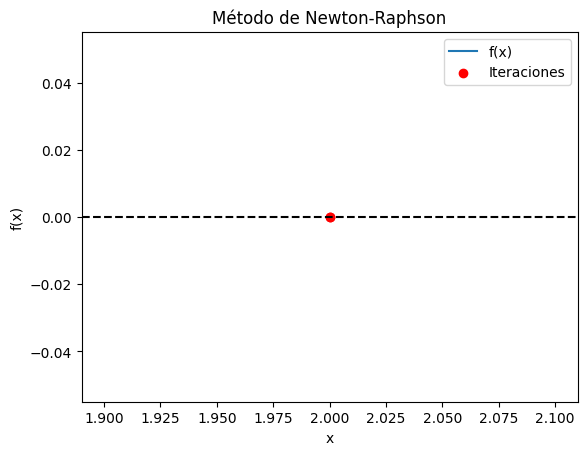


Tabla de datos:
+------------------+----------------------+----------------------+----------------------+
| Iteración        | x                    | f(x)                 | Error                |
+------------------+----------------------+----------------------+----------------------+
|        1         |      2.00000000      |    -154.00000000     |      0.00000000      |
|        2         |      2.00000000      |    -151.87970863     |      0.00000000      |
+------------------+----------------------+----------------------+----------------------+


In [ ]:
def newtonRaphson(funcion, derivada, estimacionInicial, tolerance, maximo):
    x_valor = [estimacionInicial]

    for i in range(maximo):
        x_new = x_valor[-1] - funcion(x_valor[-1]) / derivada(x_valor[-1])
        x_valor.append(x_new)

        if abs(x_valor[-1] - x_valor[-2]) < tolerance:
            break

    root = x_valor[-1]
    return root, x_valor

# Función de ejemplo y su derivada
def ejemplo(x):
    return x**3 - x**2 - 4

def ejemploDerivada(x):
    return 2*np.sin(x)-(x**2)/10

estimacionInicial = 2.0
tolerancia = 1e-6
maximo = 100

root, x_valor = newtonRaphson(ejemplo, ejemploDerivada, estimacionInicial, tolerancia, maximo)
print("Raíz aproximada:", root)

# Crear gráfica
x_range = np.linspace(min(x_valor), max(x_valor), 400)
y_range = ejemplo(x_range)

plt.plot(x_range, y_range, label='f(x)')
plt.scatter(x_valor, [ejemplo(x) for x in x_valor], color='red', label='Iteraciones')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Método de Newton-Raphson')
plt.show()

# Calcular y mostrar errores
error = np.abs(np.array([ejemplo(x) for x in x_valor]))
print("\nTabla de datos:")
print("+------------------+----------------------+----------------------+----------------------+")
print("| Iteración        | x                    | f(x)                 | Error                |")
print("+------------------+----------------------+----------------------+----------------------+")
for i in range(len(x_valor)):
    print(f"| {i+1:^16} | {x_valor[i]:^20.8f} | {ejemplo(x_vals[i]):^20.8f} | {error[i]:^20.8f} |")
print("+------------------+----------------------+----------------------+----------------------+")


# **MÉTODO DE BÚSQUEDA ALEATORIA**

El valor máximo de fn es: -0.6808363721375716
Se obtiene cuando x = -1.0214585518776618 y y = 2.9108382345738226

Tabla de datos: 
   Iteración  Aproximación         X         Y    Función
0          1    -15.803372  1.090611  2.970669 -15.803372
1          2     -8.774163  0.952064  2.040647  -8.774163
2          3     -3.554129  0.544629  1.510444  -3.554129
3          4     -3.554129 -0.103822  2.714204  -4.006851
4          5     -3.554129  0.344693  2.710135  -7.085346
5          6     -3.554129  1.860019  1.397514 -14.533696
6          7     -3.554129  1.295595  2.917846 -17.809404
7          8     -0.680836 -1.021459  2.910838  -0.680836
8          9     -0.680836  0.094322  1.757570  -1.775151
9         10     -0.680836  0.095113  2.645249  -4.968495


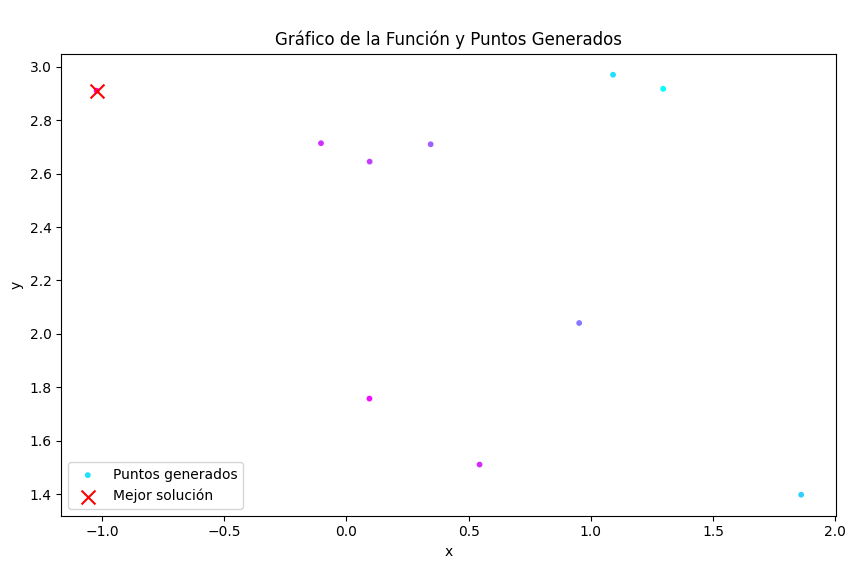

In [ ]:
def busquedaAleatoria(n=10):
    maxf = -1E9
    valor_x = []
    valor_y = []
    valor_fn = []
    aproximacion = []

    for j in range(n):
        x = -2 + 4 * random.random()
        y = 1 + 2 * random.random()
        fn = y - x - 2 * x**2 - 2 * x * y - y**2
        if fn > maxf:
            maxf = fn
            maxx = x
            maxy = y
        valor_x.append(x)
        valor_y.append(y)
        valor_fn.append(fn)
        aproximacion.append(maxf)

    print("El valor máximo de fn es:", maxf)
    print("Se obtiene cuando x =", maxx, "y y =", maxy)

    # Crear una malla de puntos para la función
    x_malla = np.linspace(-2, 2, 400)
    y_malla = np.linspace(1, 3, 400)
    X, Y = np.meshgrid(x_malla, y_malla)
    Z = Y - X - 2 * X**2 - 2 * X * Y - Y**2

    # Crear un DataFrame con los datos
    data = {
        'Iteración': range(1, n + 1),
        'Aproximación': aproximacion,
        'X': valor_x,
        'Y': valor_y,
        'Función': valor_fn
    }
    df = pd.DataFrame(data)
    print("\nTabla de datos: ")
    print(df)

    # Graficar la función y los puntos
    plt.figure(figsize=(10, 6))

    plt.scatter(valor_x, valor_y, c=valor_fn, cmap='cool', marker='o', s=10, label='Puntos generados')
    plt.scatter(maxx, maxy, c='red', marker='x', s=100, label='Mejor solución')
    plt.title('\nGráfico de la Función y Puntos Generados')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Llamar a la función para encontrar el máximo
busquedaAleatoria()
